# Regressão logística

Nesta parte do exercício, você construirá um modelo de regressão logística para prever se um tumor é benígno ou malígno. Suponha que você já tenha os dados de atributos que foram extraídos das imagens de tomograficas. Você deseja determinar a chance do tumor ser maligno ou benígno baseado no tamanho do tumor e na idade do paciente. Sua tarefa é construir um modelo de classificação que estima a probabilidade de um tumor ser maligno ou benígno baseado nos dados históricos dos pacientes

In [1]:
#bibliotecas utilizadas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

## Leitura dos dados

- X contém o tamanho dos tumores dados em milímetros e a idade 
- y é a variável categórica seja 
    - y=1=malígno
    - y=0=benigno

In [2]:
maligno = pd.DataFrame()
maligno['tamanho_tumor'] = np.random.randint(low=20,high=50, size=20)
maligno['idade'] = np.random.randint(low=30,high=50, size=20)
maligno['y'] = 1

In [3]:
benigno = pd.DataFrame()
benigno['tamanho_tumor'] = np.random.randint(low=20,high=35, size=20)
benigno['idade'] = np.random.randint(low=15,high=35, size=20)
benigno['y'] = 0

In [4]:
df = pd.concat([maligno, benigno], axis=0)

In [5]:
df.head()

,tamanho_tumor,idade,y
0,27,39,1
1,46,47,1
2,41,42,1
3,26,31,1
4,43,44,1


In [6]:
df.describe()

,tamanho_tumor,idade,y
count,40.000000,40.000000,40.00000
mean,30.500000,32.600000,0.50000
std,8.124038,9.854844,0.50637
min,20.000000,15.000000,0.00000
25%,24.750000,24.000000,0.00000
50%,28.000000,32.500000,0.50000
75%,34.000000,41.250000,1.00000
max,49.000000,49.000000,1.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tamanho_tumor  40 non-null     int64
 1   idade          40 non-null     int64
 2   y              40 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


## Visualização de dados

In [8]:
maligno = df[df['y']==1]
benigno = df[df['y']==0]

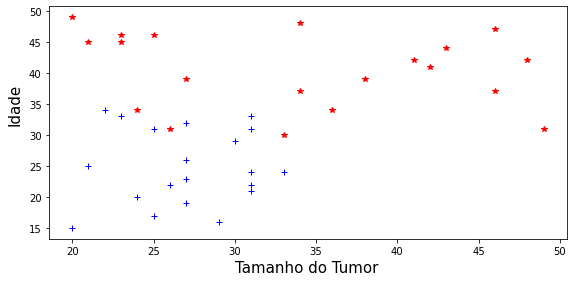

In [9]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(benigno['tamanho_tumor'],benigno['idade'], '+b')
ax.plot(maligno['tamanho_tumor'],maligno['idade'], '*r')
plt.text(30,8,'Tamanho do Tumor', fontdict={'size': 15})
plt.text(16,32,'Idade', fontdict={'size': 15}, rotation=90)
plt.tight_layout()

## Hipotese de regressão logística

$$ h_\theta(x) = g(\theta^T x)$$

onde a função $g$ é uma função sigmoidal dada por: 

$$g(z) = \frac{1}{1+e^{-z}}$$.

## Criando um modelo

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
X = df[['tamanho_tumor', 'idade']]
y = df['y']

In [12]:
model = LogisticRegression()

## Treinamento do modelo

In [13]:
model.fit(X,y)

LogisticRegression()

In [14]:
print(model.coef_)
print(model.intercept_)

[[0.23014741 0.51859171]]
[-23.60420699]


In [15]:
ỹ = model.predict(X)

## Avaliando os resultados

In [16]:
from sklearn.metrics import classification_report
from sklearn import metrics 

In [17]:
## acurácia
metrics.accuracy_score(y,ỹ)

0.9

In [18]:
## Matriz de confusão
metrics.confusion_matrix(y,ỹ)

array([[19,  1],
       [ 3, 17]])

In [19]:
## acurácia
metrics.precision_score(y,ỹ)

0.9444444444444444

In [20]:
## recall
metrics.recall_score(y,ỹ)

0.85

In [21]:
## f1-score
metrics.f1_score(y,ỹ)

0.8947368421052632

##### Relatório de Classificação

In [22]:
print(classification_report(y,ỹ))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.94      0.85      0.89        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40

